# STATS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
season = pd.read_csv('understat.csv')
game = pd.read_csv('understat_per_game.csv')

In [3]:
# setting up season
dfs = season.copy()
dfs.rename({season.columns[0]:'league',season.columns[1]:'year'},axis=1,inplace=True)

In [4]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        684 non-null    object 
 1   year          684 non-null    int64  
 2   position      684 non-null    int64  
 3   team          684 non-null    object 
 4   matches       684 non-null    int64  
 5   wins          684 non-null    int64  
 6   draws         684 non-null    int64  
 7   loses         684 non-null    int64  
 8   scored        684 non-null    int64  
 9   missed        684 non-null    int64  
 10  pts           684 non-null    int64  
 11  xG            684 non-null    float64
 12  xG_diff       684 non-null    float64
 13  npxG          684 non-null    float64
 14  xGA           684 non-null    float64
 15  xGA_diff      684 non-null    float64
 16  npxGA         684 non-null    float64
 17  npxGD         684 non-null    float64
 18  ppda_coef     684 non-null    

In [28]:
dfs['league'].drop_duplicates()

0         La_liga
120           EPL
240    Bundesliga
348       Serie_A
468       Ligue_1
588          RFPL
Name: league, dtype: object

In [29]:
leagues_in_focus = ['La_liga','EPL','Bundesliga']

In [31]:
dfs = dfs[dfs['league'].isin(leagues_in_focus)].copy()

In [34]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        348 non-null    object 
 1   year          348 non-null    int64  
 2   position      348 non-null    int64  
 3   team          348 non-null    object 
 4   matches       348 non-null    int64  
 5   wins          348 non-null    int64  
 6   draws         348 non-null    int64  
 7   loses         348 non-null    int64  
 8   scored        348 non-null    int64  
 9   missed        348 non-null    int64  
 10  pts           348 non-null    int64  
 11  xG            348 non-null    float64
 12  xG_diff       348 non-null    float64
 13  npxG          348 non-null    float64
 14  xGA           348 non-null    float64
 15  xGA_diff      348 non-null    float64
 16  npxGA         348 non-null    float64
 17  npxGD         348 non-null    float64
 18  ppda_coef     348 non-null    

In [5]:
# setting up game
dfg = game.copy()
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24580 entries, 0 to 24579
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        24580 non-null  object 
 1   year          24580 non-null  int64  
 2   h_a           24580 non-null  object 
 3   xG            24580 non-null  float64
 4   xGA           24580 non-null  float64
 5   npxG          24580 non-null  float64
 6   npxGA         24580 non-null  float64
 7   deep          24580 non-null  int64  
 8   deep_allowed  24580 non-null  int64  
 9   scored        24580 non-null  int64  
 10  missed        24580 non-null  int64  
 11  xpts          24580 non-null  float64
 12  result        24580 non-null  object 
 13  date          24580 non-null  object 
 14  wins          24580 non-null  int64  
 15  draws         24580 non-null  int64  
 16  loses         24580 non-null  int64  
 17  pts           24580 non-null  int64  
 18  npxGD         24580 non-nu

In [35]:
dfg = dfg[dfg['league'].isin(leagues_in_focus)].copy()

In [36]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12792 entries, 0 to 12791
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        12792 non-null  object 
 1   year          12792 non-null  int64  
 2   h_a           12792 non-null  object 
 3   xG            12792 non-null  float64
 4   xGA           12792 non-null  float64
 5   npxG          12792 non-null  float64
 6   npxGA         12792 non-null  float64
 7   deep          12792 non-null  int64  
 8   deep_allowed  12792 non-null  int64  
 9   scored        12792 non-null  int64  
 10  missed        12792 non-null  int64  
 11  xpts          12792 non-null  float64
 12  result        12792 non-null  object 
 13  date          12792 non-null  object 
 14  wins          12792 non-null  int64  
 15  draws         12792 non-null  int64  
 16  loses         12792 non-null  int64  
 17  pts           12792 non-null  int64  
 18  npxGD         12792 non-nu

### Data visualization

In [6]:
# Creating a correlation heatmap
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    mask_annot = np.absolute(cor.values) >= 0.5
    annot = np.where(mask_annot, cor.values, np.full(cor.shape,""))
    sns.heatmap(data = cor, annot = annot, cmap = plt.cm.Reds, fmt='.3')
    plt.show()

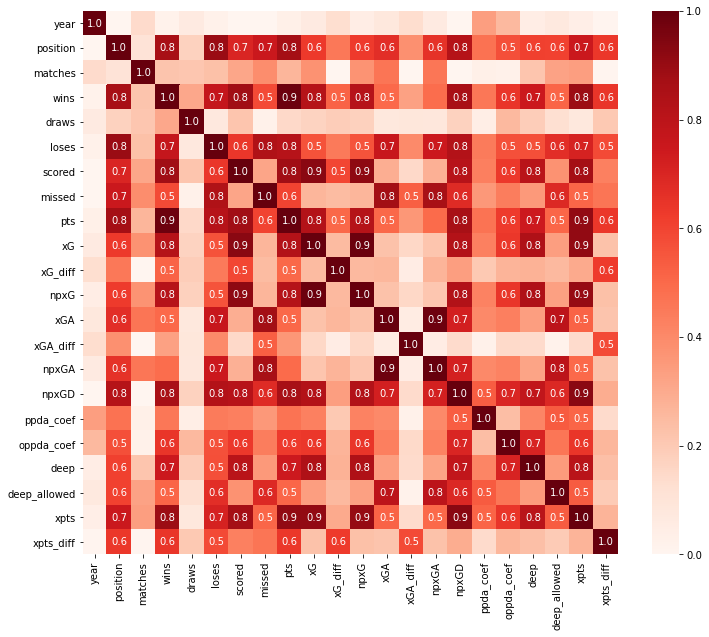

In [9]:
cor_heatmap(dfs.corr(method='pearson').abs())

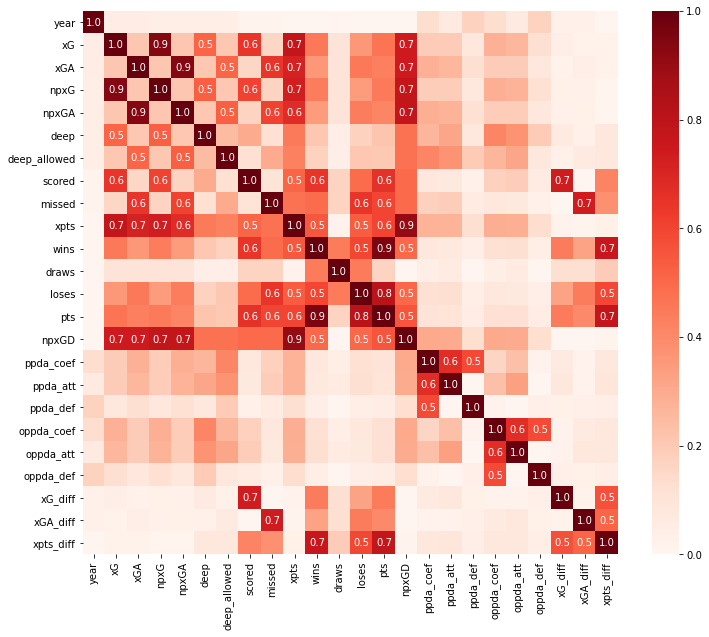

In [10]:
cor_heatmap(dfg.corr(method='pearson').abs())

In [16]:
dfg.columns

Index(['league', 'year', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'ppda_coef', 'ppda_att', 'ppda_def',
       'oppda_coef', 'oppda_att', 'oppda_def', 'team', 'xG_diff', 'xGA_diff',
       'xpts_diff'],
      dtype='object')

In [26]:
num_var2 = ['xG', 'xGA', 'npxG', 'npxGA', 'deep',
            'deep_allowed', 'scored', 'missed', 
            'xpts',#'wins','draws', 'loses', 'pts', 
            'npxGD', 'ppda_coef', 'ppda_att', 
            'ppda_def','oppda_coef', 'oppda_att', 
            'oppda_def', 'xG_diff', 'xGA_diff','xpts_diff']

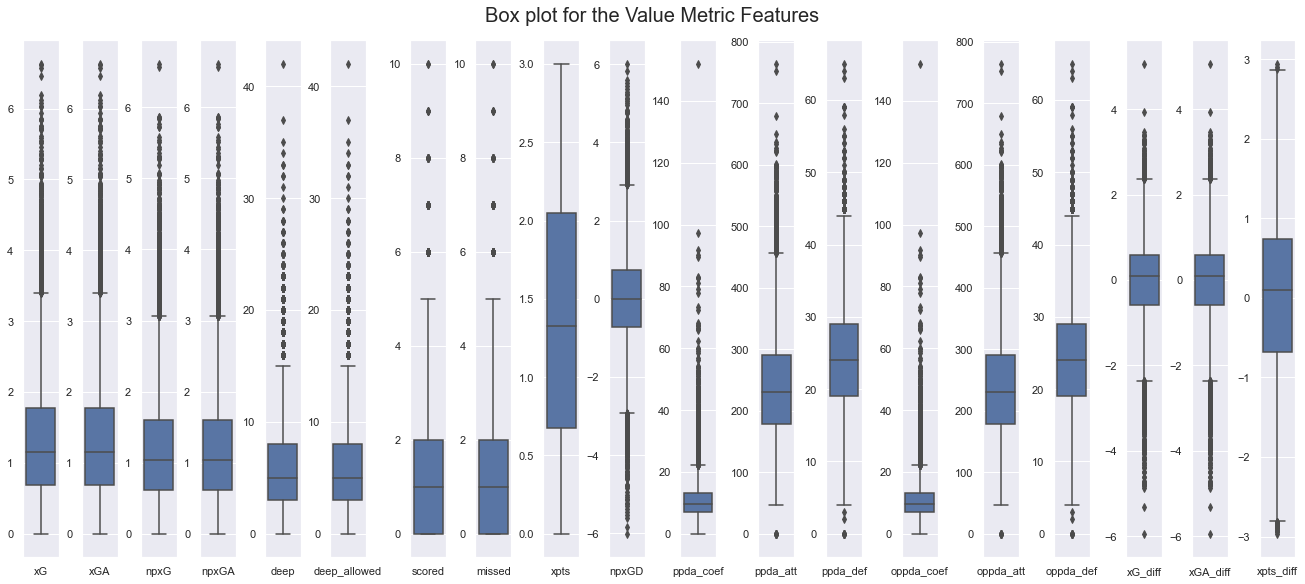

In [27]:
sns.set()

value = dfg[num_var2]
plot_features = value.columns
fig, axes = plt.subplots(1, len(plot_features), figsize=(18,8), constrained_layout=True)
j=0
k=1

for i in zip(axes, plot_features):
    sns.boxplot(data=value.iloc[:,j:k], ax=i[0])
    j=j+1
    k=k+1
    
plt.suptitle("Box plot for the Value Metric Features", fontsize=20)
plt.show()